In [1]:
import cv_strategy
import pandas as pd
import tushare as ts
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import akshare as ak

In [193]:
sz50_data = ts.get_k_data('sz50',start='2000-01-01',ktype='D').set_index('date')


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [194]:
period=240
period2 = 120

# sz50['pos'] = (sz50.close-sz50.close.rolling(period).mean())/sz50.close.rolling(period).std()

sz50=sz50_data.copy()
sz50['return'] = sz50.close.pct_change()
sz50['pos'] = sz50.close/sz50.close.shift(period)
sz50['posma'] = sz50.pos.rolling(period2).mean()
sz50.dropna(inplace=True)

In [195]:
df_wt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_wt.iloc[0,0] = 0.5
df_wt.iloc[0,1] = 0.5

In [206]:
df_rt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_rt['cash'] = 0.00015
df_rt['sz50'] = sz50['return']

In [207]:
# signal = np.percentile(sz50.pos,[1,99])
signal=[0.8,1.8]
print(signal)

[0.8, 1.8]


In [208]:
for i in sz50.index[1:]:
    df_wt.loc[i,'cash'] = df_wt.shift(1).loc[i,'cash']*(1+df_rt.loc[i,'cash'])
    df_wt.loc[i,'sz50'] = df_wt.shift(1).loc[i,'sz50']*(1+df_rt.loc[i,'sz50'])
    
    if sz50.loc[i,'pos']>sz50.loc[i,'posma']:    #signal[0]:
        df_wt.loc[i,'sz50'] = df_wt.loc[i].sum()
        df_wt.loc[i,'cash'] = 0
    elif sz50.loc[i,'pos']<sz50.loc[i,'posma']:  #signal[1]:
        df_wt.loc[i,'cash'] = df_wt.loc[i].sum()
        df_wt.loc[i,'sz50'] = 0
print(df_wt.T.sum()[-1])

22.32926149602145


<AxesSubplot:xlabel='date'>

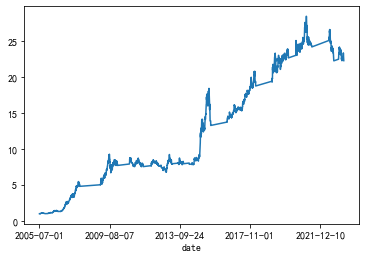

In [209]:
df_wt.T.sum().plot()

<AxesSubplot:xlabel='date'>

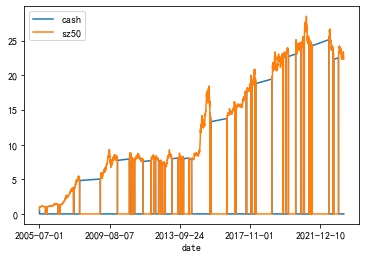

In [210]:
df_wt.plot()

<AxesSubplot:xlabel='date'>

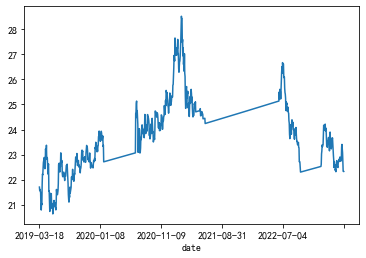

In [211]:
df_wt.T.sum().iloc[-1000:].plot()

In [212]:
22.4**(1/18)

1.188539935468345